In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

The dataset contains information regarding flight ticket prices along with other associated features. The dataset can be used to analyse what factors affect the flight ticket prices, it can also be used to prepare machine learning model which predicts the flight tickt prices.

In [166]:
df_train = pd.read_excel("Flight_Data_Train.xlsx",parse_dates=["Date_of_Journey"])
df_test = pd.read_excel("Flight_Test_set.xlsx",parse_dates=["Date_of_Journey"])
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [167]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [168]:
df_train.shape

(10683, 11)

In [169]:
df_test.shape

(2671, 10)

Let's concatenate the training & testing dataset for uniform preprocessing using a key to later split them again

In [170]:
df_train["training"] = 1
df_test["training"] = 0

In [171]:
df = pd.concat([df_train,df_test])
df.shape

(13354, 12)

In [172]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,training
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1


In [173]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
training              0
dtype: int64

Let us find the number of duplicated entries in the merged dataset and remove them

In [174]:
df.duplicated().sum()

246

In [175]:
df= df.drop_duplicates()

In [176]:
df.duplicated().sum()

0

In [178]:
#Checking for null values in the dataset before feature transformaton
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2645
training              0
dtype: int64

In [179]:
df.shape

(13108, 12)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          13108 non-null  object        
 1   Date_of_Journey  13108 non-null  datetime64[ns]
 2   Source           13108 non-null  object        
 3   Destination      13108 non-null  object        
 4   Route            13107 non-null  object        
 5   Dep_Time         13108 non-null  object        
 6   Arrival_Time     13108 non-null  object        
 7   Duration         13108 non-null  object        
 8   Total_Stops      13107 non-null  object        
 9   Additional_Info  13108 non-null  object        
 10  Price            10463 non-null  float64       
 11  training         13108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 1.3+ MB


Let's look at the distribution of all features

In [181]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Text(0.5, 1.0, 'Number of Cases as per Airline')

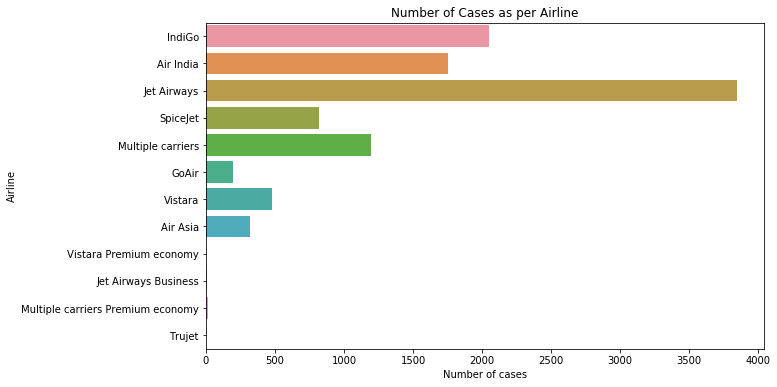

In [182]:
plt.figure(figsize=(10,6))
sns.countplot(y=df_train["Airline"])
plt.xlabel('Number of cases')
plt.title('Number of Cases as per Airline')

Most of the cases in the dataset belong to Jet Airways followed by Indigo, Air India in order

Let's extract all info from Date_Of_Journey for analysis & model

In [183]:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,training,year,month,day,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,2019,3,24,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,2019,1,5,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,2019,9,6,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,2019,12,5,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,2019,1,3,3


let's drop the date_of_journey feature for the model also we have extracted all data from it into different columns

In [184]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Dep_Time         13108 non-null  object 
 5   Arrival_Time     13108 non-null  object 
 6   Duration         13108 non-null  object 
 7   Total_Stops      13107 non-null  object 
 8   Additional_Info  13108 non-null  object 
 9   Price            10463 non-null  float64
 10  training         13108 non-null  int64  
 11  year             13108 non-null  int64  
 12  month            13108 non-null  int64  
 13  day              13108 non-null  int64  
 14  weekday          13108 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [186]:
df["year"].nunique()

1

In [187]:
df["year"].value_counts()

2019    13108
Name: year, dtype: int64

In [188]:
#Dropping the year column as it does not contain any useful information
df.drop("year",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Dep_Time         13108 non-null  object 
 5   Arrival_Time     13108 non-null  object 
 6   Duration         13108 non-null  object 
 7   Total_Stops      13107 non-null  object 
 8   Additional_Info  13108 non-null  object 
 9   Price            10463 non-null  float64
 10  training         13108 non-null  int64  
 11  month            13108 non-null  int64  
 12  day              13108 non-null  int64  
 13  weekday          13108 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.5+ MB


In [190]:
df_train = df[df["training"]==1] #We are plotting only from training dataset

Text(0.5, 1.0, 'Number of Cases as per month')

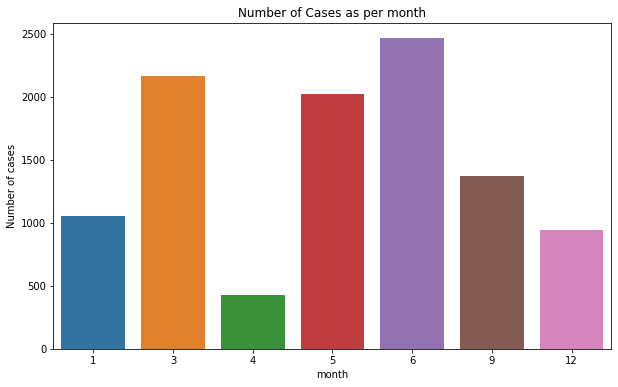

In [191]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["month"])
plt.ylabel('Number of cases')
plt.title('Number of Cases as per month')

Most of the cases belong to June followed by March, May in order

Text(0.5, 1.0, 'Number of Cases as per day')

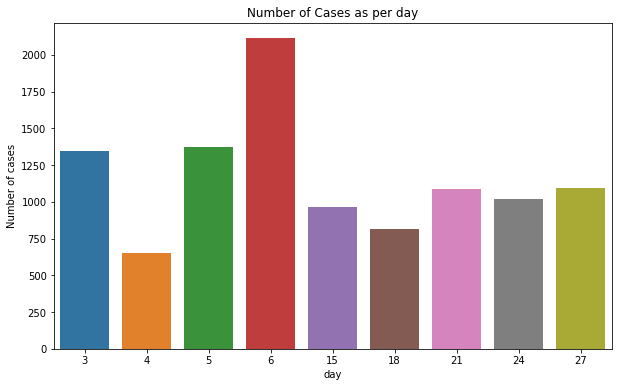

In [192]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["day"])
plt.ylabel('Number of cases')
plt.title('Number of Cases as per day')

Most of the cases belong to 6th day of any month followed by 5th, 3rd in order

Text(0.5, 1.0, 'Number of Cases as per weekday')

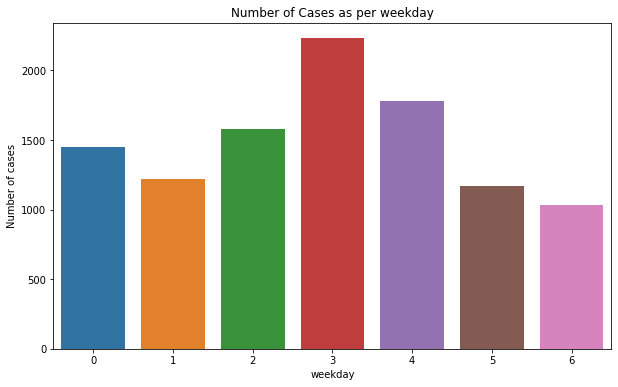

In [193]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["weekday"])
plt.ylabel('Number of cases')
plt.title('Number of Cases as per weekday')

Most of the cases in the dataset belong to Thursday followed by Friday, Wednesday in order

Text(0.5, 1.0, 'Number of Cases as per Source')

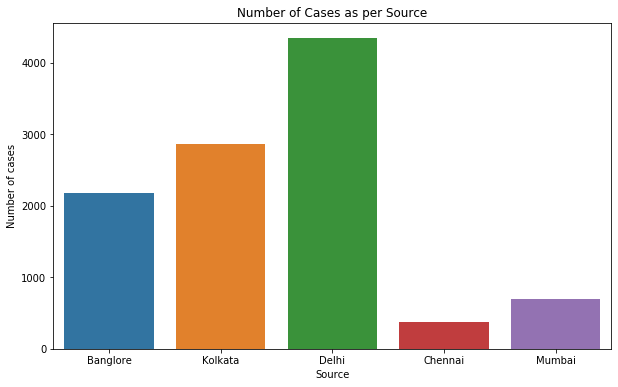

In [194]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Source"])
plt.ylabel('Number of cases')
plt.title('Number of Cases as per Source')

Most of the cases have Delhi as the source followed by Kolkata,Bangalore in order

Text(0.5, 1.0, 'Number of Cases as per Destination')

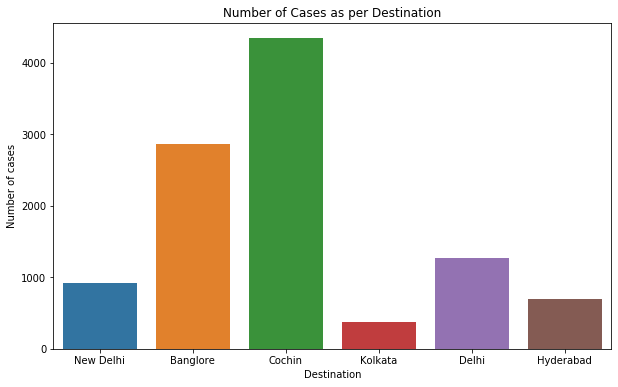

In [195]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Destination"])
plt.ylabel('Number of cases')
plt.title('Number of Cases as per Destination')

Most of the cases have Cochin as destination followed by Bangalore, Delhi in order

In [196]:
df["Route"].nunique()

132

We have 132 unique flight routes in training & testing set

In [197]:
df["Route"].value_counts()

DEL → BOM → COK                2996
BLR → DEL                      1922
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BLR → HBX → BOM → BHO → DEL       1
BLR → HBX → BOM → NAG → DEL       1
BOM → NDC → HYD                   1
BOM → VGA → TIR → HYD             1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64

In [198]:
df["Dep_Time"].nunique()

223

We have 223 unique departure times in training & testing set

In [199]:
df["Dep_Time"].value_counts()

18:55    287
17:00    275
10:00    257
07:10    238
07:05    237
        ... 
21:40      1
12:05      1
04:15      1
12:45      1
16:25      1
Name: Dep_Time, Length: 223, dtype: int64

Let us extract the departure hour for simplification & for machine learning model

In [200]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,training,month,day,weekday,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,1,3,24,6,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,1,5,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,1,9,6,4,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,12,5,3,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,1,3,3,16


In [201]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Number of Cases as per Departure Hour')

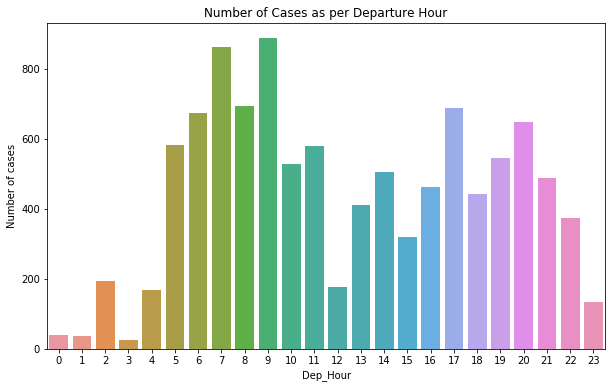

In [202]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Dep_Hour"])
plt.ylabel('Number of cases')
plt.title('Number of Cases as per Departure Hour')

Most of the cases in the datasets have departure times in the morning followed by evening

In [203]:
#dropping the Dep_Time as we have extracted the hours from it
df.drop("Dep_Time",axis=1,inplace=True)

In [204]:
df["Arrival_Time"].nunique()

1451

In [205]:
df["Arrival_Time"].value_counts()

19:00           524
21:00           465
19:15           432
16:10           185
12:35           159
               ... 
04:35 28 May      1
01:20 07 Mar      1
01:20 25 Apr      1
00:35 19 Mar      1
01:00 02 Jun      1
Name: Arrival_Time, Length: 1451, dtype: int64

Let's drop the Arrival_Time column as it does not have uniform format and there are 1343 different entries

In [206]:
df.drop("Arrival_Time",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Duration         13108 non-null  object 
 5   Total_Stops      13107 non-null  object 
 6   Additional_Info  13108 non-null  object 
 7   Price            10463 non-null  float64
 8   training         13108 non-null  int64  
 9   month            13108 non-null  int64  
 10  day              13108 non-null  int64  
 11  weekday          13108 non-null  int64  
 12  Dep_Hour         13108 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [207]:
df["Duration"].nunique()

374

In [208]:
df["Duration"].value_counts()

2h 50m     665
1h 30m     493
2h 45m     430
2h 55m     411
2h 35m     399
          ... 
22h 50m      1
40h 20m      1
32h 25m      1
42h 45m      1
31h 10m      1
Name: Duration, Length: 374, dtype: int64

In [209]:
df[['Duration_hours','Duration minutes']] = df.Duration.str.split("h",expand=True,)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,training,month,day,weekday,Dep_Hour,Duration_hours,Duration minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,1,3,24,6,22,2,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,1,5,5,5,7,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,1,9,6,4,9,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,1,12,5,3,18,5,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,1,3,3,16,4,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,0,6,6,3,20,23,55m
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,0,3,27,2,14,2,35m
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,0,6,3,0,21,6,35m
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,0,6,3,0,4,15,15m


In [210]:
#Dropping the duration column as we have extracted useful info from it
df.drop("Duration",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13108 non-null  object 
 1   Source            13108 non-null  object 
 2   Destination       13108 non-null  object 
 3   Route             13107 non-null  object 
 4   Total_Stops       13107 non-null  object 
 5   Additional_Info   13108 non-null  object 
 6   Price             10463 non-null  float64
 7   training          13108 non-null  int64  
 8   month             13108 non-null  int64  
 9   day               13108 non-null  int64  
 10  weekday           13108 non-null  int64  
 11  Dep_Hour          13108 non-null  int64  
 12  Duration_hours    13108 non-null  object 
 13  Duration minutes  13106 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [211]:
df["Duration minutes"].nunique()

12

The duration minues does not contain much info so let's drop it

In [212]:
df.drop("Duration minutes",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Total_Stops      13107 non-null  object 
 5   Additional_Info  13108 non-null  object 
 6   Price            10463 non-null  float64
 7   training         13108 non-null  int64  
 8   month            13108 non-null  int64  
 9   day              13108 non-null  int64  
 10  weekday          13108 non-null  int64  
 11  Dep_Hour         13108 non-null  int64  
 12  Duration_hours   13108 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [213]:
df["Duration_hours"].nunique()

44

In [214]:
df["Duration_hours"].value_counts()

2     2949
1      785
3      626
5      608
7      600
9      551
12     534
8      531
13     488
11     464
10     459
6      442
14     424
15     333
23     306
16     285
4      278
26     264
24     238
22     231
25     228
27     217
21     210
20     202
18     166
17     160
19     158
28     115
29      61
30      59
38      38
37      22
33      18
32      12
35      10
36       9
34       8
31       8
5m       2
39       2
42       2
40       2
47       2
41       1
Name: Duration_hours, dtype: int64

There's two garbage value of 5 minutes in the datset so let's replace it by NaN

In [215]:
df["Duration_hours"].replace('5m', np.NaN,inplace=True)

In [216]:
df["Duration_hours"].nunique()

43

Let's convert the Duration_hours column to numeric for the model and plots

In [217]:
df.Duration_hours = df.Duration_hours.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13108 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13107 non-null  object 
 4   Total_Stops      13107 non-null  object 
 5   Additional_Info  13108 non-null  object 
 6   Price            10463 non-null  float64
 7   training         13108 non-null  int64  
 8   month            13108 non-null  int64  
 9   day              13108 non-null  int64  
 10  weekday          13108 non-null  int64  
 11  Dep_Hour         13108 non-null  int64  
 12  Duration_hours   13106 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.4+ MB


In [218]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Number of Cases as per Duration in Hours')

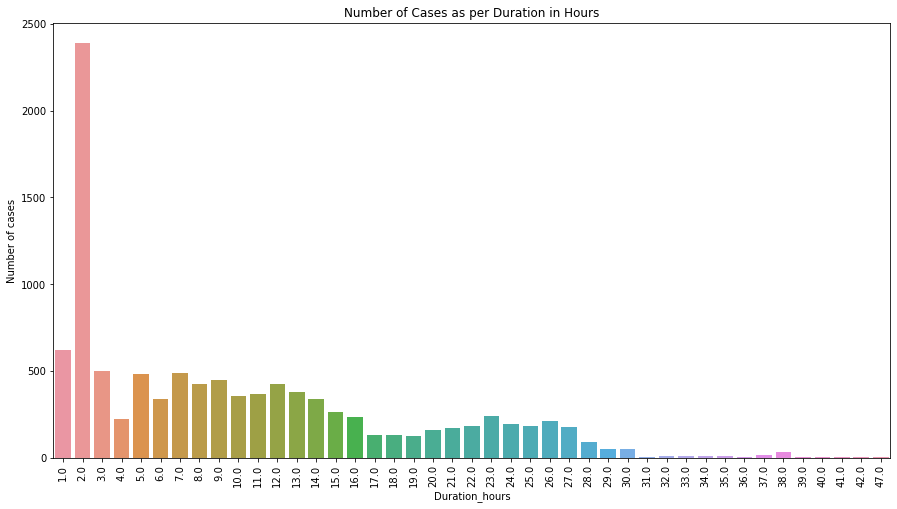

In [219]:
plt.figure(figsize=(15,8))
sns.countplot(df_train["Duration_hours"])
plt.ylabel('Number of cases')
plt.xticks(rotation=90)
plt.title('Number of Cases as per Duration in Hours')

Highest number of cases in the dataset had had flight duration  of around 2 hours

In [220]:
df["Total_Stops"].nunique()

5

In [221]:
df["Total_Stops"].value_counts()

1 stop      7052
non-stop    4321
2 stops     1678
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

In [222]:
df["Total_Stops"] = df["Total_Stops"].replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})

In [223]:
df["Total_Stops"].value_counts()

1.0    7052
0.0    4321
2.0    1678
3.0      54
4.0       2
Name: Total_Stops, dtype: int64

In [224]:
df_train = df[df["training"]==1]

Text(0.5, 1.0, 'Number of Cases as per Total Number of Stops')

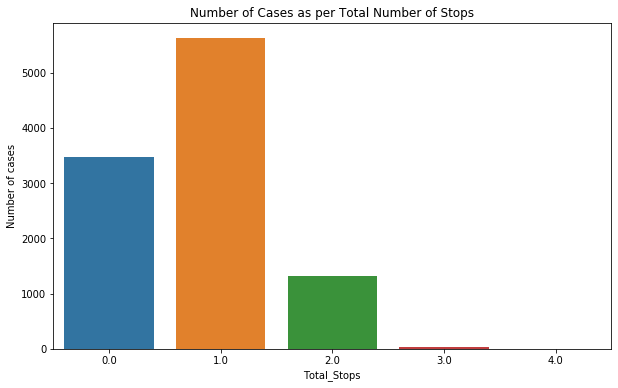

In [225]:
plt.figure(figsize=(10,6))
sns.countplot(df_train["Total_Stops"])
plt.ylabel('Number of cases')
#plt.xticks(rotation=90)
plt.title('Number of Cases as per Total Number of Stops')

Most of the flight cases in the dataset had 1 stop followed by 0 stops (non-stop)

In [226]:
df["Additional_Info"].nunique()

10

In [227]:
df["Additional_Info"].value_counts()

No info                         10309
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

Very few of the flight cases had additional info

In [228]:
df_train = df[df["training"]==1] # Plotting only from the training dataset

Text(0.5, 1.0, 'Ticket Price - Distplot')

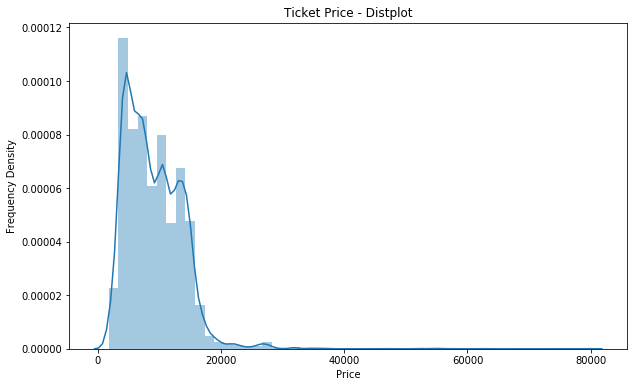

In [229]:
plt.figure(figsize=(10,6))
sns.distplot(df_train["Price"])
#plt.xticks(rotation = 90)
plt.xlabel('Price')
plt.ylabel('Frequency Density')
plt.title('Ticket Price - Distplot')

The distribution of ticket prices is highly skewed to the right

Bivariate analysis: let's look at flight price relationship with other features in the dataset

Text(0.5, 1.0, 'Airline vs Price - Boxplot')

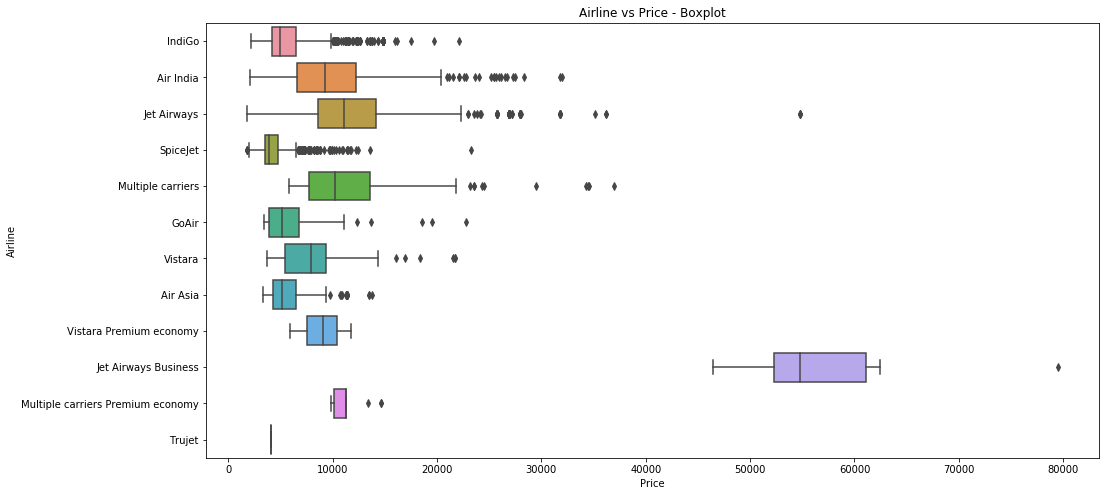

In [230]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Price",y="Airline", data=df_train)
plt.title('Airline vs Price - Boxplot')

The median price of Jet Airways Business flight ticket is the highest in the dataset, also SpiceJet, Indigo, Air Asia & Vistara have the minimun median flight ticket prices

Text(0.5, 1.0, 'Source vs Price - Boxplot')

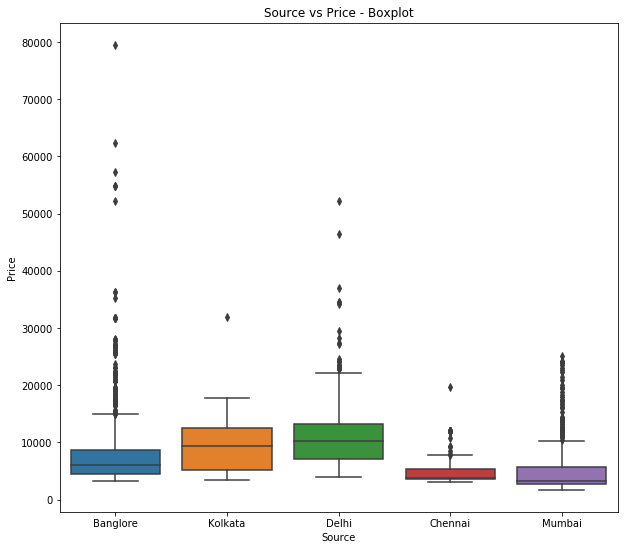

In [231]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Source", y="Price",data=df_train)
plt.title('Source vs Price - Boxplot')

The median flight prices were highest for flights from Delhi, followed by Kolkata and least for flights from Mumbai & Chennai

Text(0.5, 1.0, 'Destination vs Price - Boxplot')

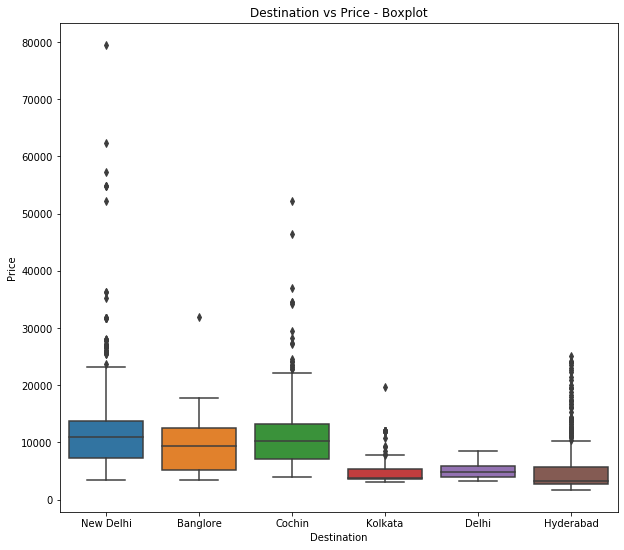

In [232]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Destination", y="Price",data=df_train)
plt.title('Destination vs Price - Boxplot')

The median flight prices were highest for flights to New Delhi followed by Cochin, also median price is least for Hyderabad followed by Kolkata

Text(0.5, 1.0, 'Total_Stops vs Price - Boxplot')

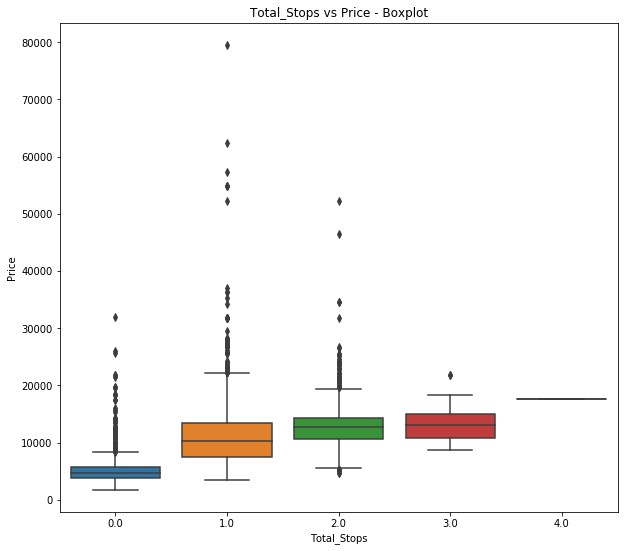

In [233]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Total_Stops", y="Price",data=df_train)
plt.title('Total_Stops vs Price - Boxplot')

The median price increases as the number of stops increases

Text(0.5, 1.0, 'Additional_Info vs Price - Boxplot')

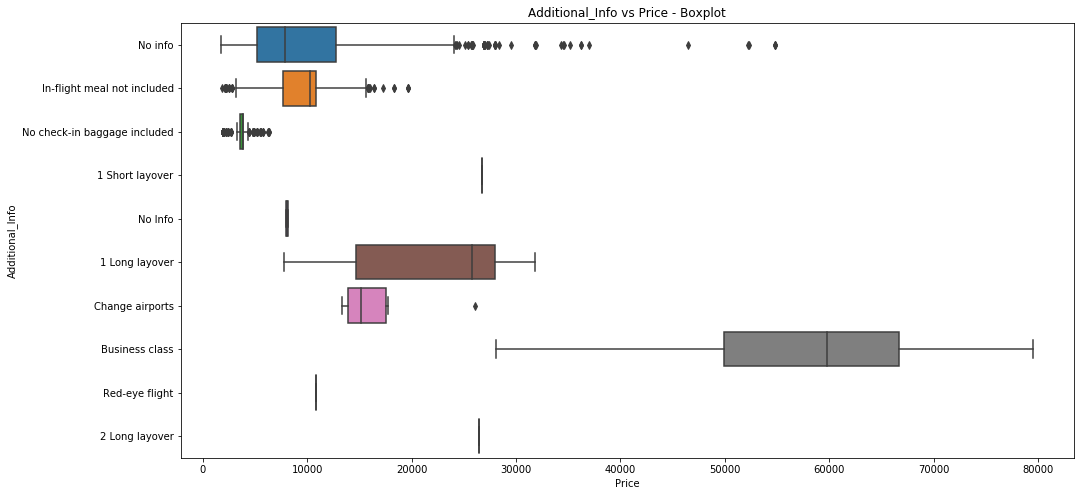

In [234]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Price",y="Additional_Info", data=df_train)
plt.title('Additional_Info vs Price - Boxplot')

Business Class tickets have the highest median ticket prices and median ticket prices were the least for No check in baggage included

Text(0.5, 1.0, 'Month vs Price - Boxplot')

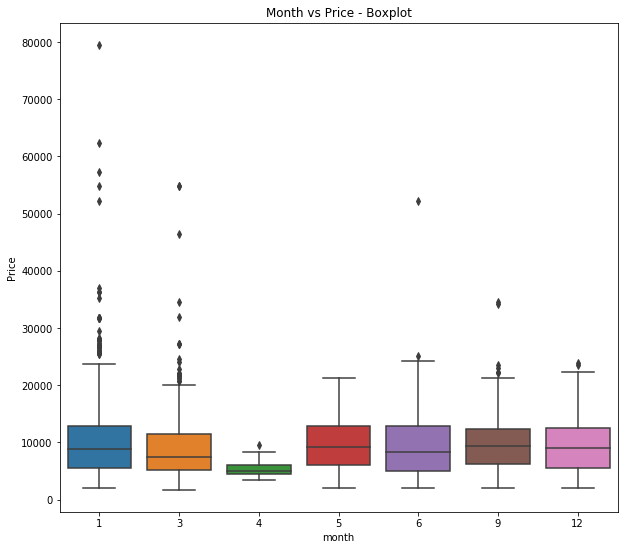

In [235]:
plt.figure(figsize=(10,9))
sns.boxplot(x="month", y="Price",data=df_train)
plt.title('Month vs Price - Boxplot')

The median prices are lowest for April compared to other months

Text(0.5, 1.0, 'Day of month vs Price - Boxplot')

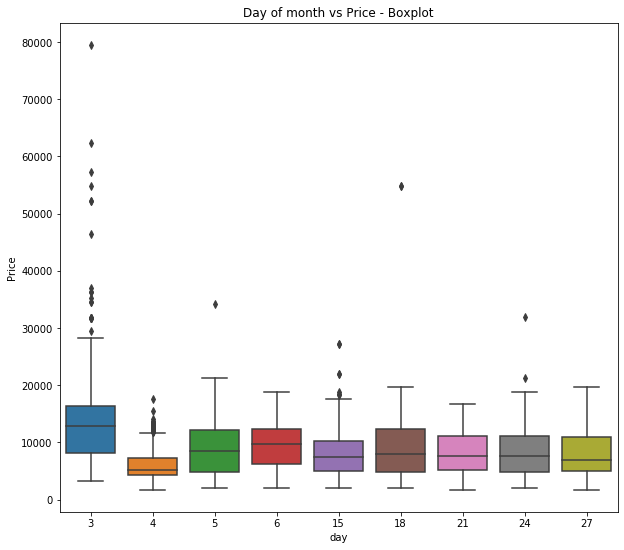

In [236]:
plt.figure(figsize=(10,9))
sns.boxplot(x="day", y="Price",data=df_train)
plt.title('Day of month vs Price - Boxplot')

4th of any month had lowest ticket prices and 3rd had the highest prices

Text(0.5, 1.0, 'weekday vs Price - Boxplot')

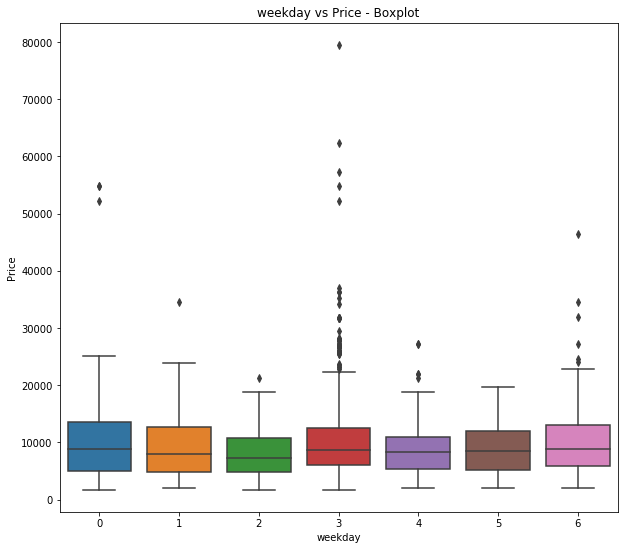

In [237]:
plt.figure(figsize=(10,9))
sns.boxplot(x="weekday", y="Price",data=df_train)
plt.title('weekday vs Price - Boxplot')

Text(0.5, 1.0, 'Dep_Hour vs Price - Boxplot')

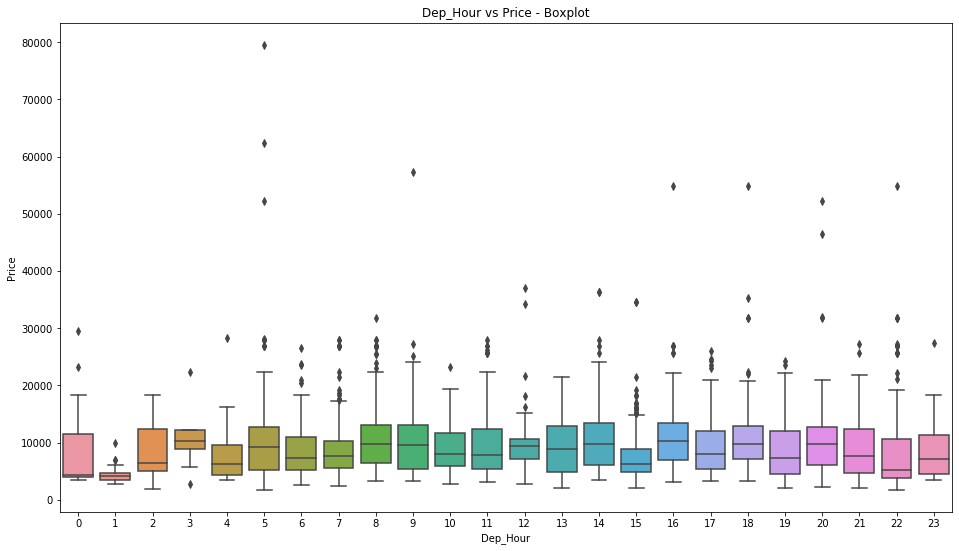

In [238]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Dep_Hour", y="Price",data=df_train)
plt.title('Dep_Hour vs Price - Boxplot')

The median price was lowest for flights with departure time around 1 AM at night

Text(0.5, 1.0, 'Duration_hours vs Price - Boxplot')

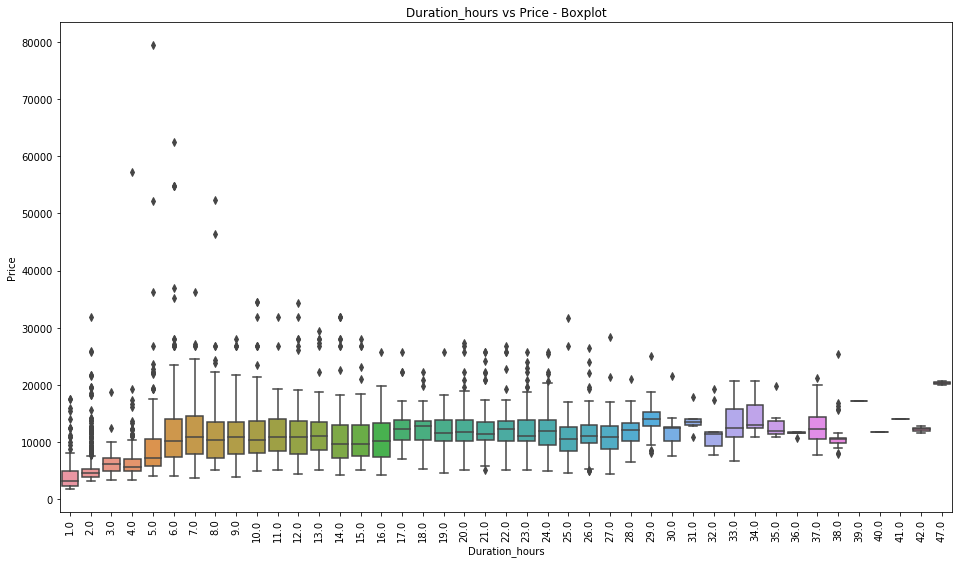

In [239]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Duration_hours", y="Price",data=df_train)
plt.xticks(rotation=90)
plt.title('Duration_hours vs Price - Boxplot')

As the duration of flight increases, the median prices of the flight tickets also increase

In [240]:
#Let's look at the null values present in the dataset
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price              2645
training              0
month                 0
day                   0
weekday               0
Dep_Hour              0
Duration_hours        2
dtype: int64

In [241]:
df.shape

(13108, 13)

In [242]:
# Let's drop the null value cases for the model
df.dropna(subset=["Route","Total_Stops","Duration_hours"],inplace=True)
df.shape

(13105, 13)

In [243]:
#Let's look at the null values present in the dataset
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops           0
Additional_Info       0
Price              2644
training              0
month                 0
day                   0
weekday               0
Dep_Hour              0
Duration_hours        0
dtype: int64

In [244]:
df.skew()

Total_Stops       0.332165
Price             1.858221
training         -1.486526
month             0.622572
day               0.396560
weekday          -0.003708
Dep_Hour          0.104544
Duration_hours    0.894316
dtype: float64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13105 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13105 non-null  object 
 1   Source           13105 non-null  object 
 2   Destination      13105 non-null  object 
 3   Route            13105 non-null  object 
 4   Total_Stops      13105 non-null  float64
 5   Additional_Info  13105 non-null  object 
 6   Price            10461 non-null  float64
 7   training         13105 non-null  int64  
 8   month            13105 non-null  int64  
 9   day              13105 non-null  int64  
 10  weekday          13105 non-null  int64  
 11  Dep_Hour         13105 non-null  int64  
 12  Duration_hours   13105 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.4+ MB


In [246]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,training,month,day,weekday,Dep_Hour,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897.0,1,3,24,6,22,2.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662.0,1,1,5,5,5,7.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882.0,1,9,6,4,9,19.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218.0,1,12,5,3,18,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302.0,1,1,3,3,16,4.0


In [247]:
cat = pd.get_dummies(df)
cat

,Total_Stops,Price,training,month,day,weekday,Dep_Hour,Duration_hours,Airline_Air Asia,Airline_Air India,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897.0,1,3,24,6,22,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,7662.0,1,1,5,5,5,7.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882.0,1,9,6,4,9,19.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218.0,1,12,5,3,18,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302.0,1,1,3,3,16,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.0,NaN,0,6,6,3,20,23.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2667,0.0,NaN,0,3,27,2,14,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2668,1.0,NaN,0,6,3,0,21,6.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2669,1.0,NaN,0,6,3,0,4,15.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [248]:
cat.columns

Index(['Total_Stops', 'Price', 'training', 'month', 'day', 'weekday',
       'Dep_Hour', 'Duration_hours', 'Airline_Air Asia', 'Airline_Air India',
       ...
       'Additional_Info_1 Long layover', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype='object', length=173)

In [249]:
cat.shape

(13105, 173)

In [250]:
cat.drop(["Airline_Air Asia","Source_Banglore","Destination_Banglore","Additional_Info_No info","Route_BOM → RPR → VTZ → HYD"],axis=1,inplace=True)
cat.shape

(13105, 168)

In [251]:
train = cat[cat["training"]==1]
test = cat[cat["training"]==0]

In [252]:
train.shape

(10461, 168)

In [253]:
test.shape

(2644, 168)

In [254]:
test.head()

,Total_Stops,Price,training,month,day,weekday,Dep_Hour,Duration_hours,Airline_Air India,Airline_GoAir,...,Route_MAA → CCU,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1.0,NaN,0,6,6,3,17,10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,NaN,0,12,5,3,6,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,NaN,0,5,21,1,19,23.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,NaN,0,5,21,1,8,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,NaN,0,6,24,0,23,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
test.drop("Price",axis=1,inplace=True)

In [256]:
test.shape

(2644, 167)

In [257]:
X=train.drop("Price", axis=1)
y=train["Price"]

In [258]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)
X2

array([[-1.21455201,  0.        , -0.8461666 , ..., -0.01693699,
        -0.17706403, -0.00977764],
       [ 1.81343383,  0.        , -1.51387036, ..., -0.01693699,
        -0.17706403, -0.00977764],
       [ 1.81343383,  0.        ,  1.15694469, ..., -0.01693699,
        -0.17706403, -0.00977764],
       ...,
       [-1.21455201,  0.        , -0.51231472, ..., -0.01693699,
        -0.17706403, -0.00977764],
       [-1.21455201,  0.        , -1.51387036, ..., -0.01693699,
        -0.17706403, -0.00977764],
       [ 1.81343383,  0.        ,  1.15694469, ..., -0.01693699,
        -0.17706403, -0.00977764]])

Finding best random_state for Linear Regression Model

In [259]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("max R2 score corresponding to random state",final_r_state,"is",max_r2_score)

max R2 score corresponding to random state 36 is 0.7494133076028276


In [260]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=36)

In [261]:
print(X_train.shape,"\n",X_test.shape)

(8368, 167) 
 (2093, 167)


In [262]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [263]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()#(n_neighbors=2)
#SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()#(n_estimators=100,base_estimator=SV,algorithm='SAMME')
GBC = GradientBoostingRegressor()
XGB = xgb.XGBRegressor()# From the GridSearchCV parameter tuning

In [264]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
#models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [265]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=36, shuffle=True)

In [266]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
for name,model in models:
    print("*****************",name,"******************\n")
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    print("\n")
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    print("\n")
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    print("\n")
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error\n", mse)
    MSE.append(mse)
    print("\n")
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error \n{}".format(mae))
    MAE.append(mae)
    print("\n\n")

***************** LinearRegression ******************

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 Score =  0.7494133076028276


Cross val score =  -8316429014241853.0


Mean Squared error
 5476218.811375619


Mean absolute error 
1598.0981894007173



***************** Ridge ******************

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


R2 Score =  0.7506536184938121


Cross val score =  0.7336592393265473


Mean Squared error
 5449113.565808957


Mean absolute error 
1601.2574830145109



***************** Lasso ******************

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


R2 Score =  0.7489056106400152


Cross val score =  0.7325668211589798


Mean Squared error
 5487313.812597093


Mean absolute e

In [267]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.749413,-8.316429e+15,5.476219e+06,1598.098189
1,Ridge,0.750654,7.336592e-01,5.449114e+06,1601.257483
2,Lasso,0.748906,7.325668e-01,5.487314e+06,1613.137409
3,KNeighborsRegressor,0.587946,6.110262e-01,9.004868e+06,1912.470807
4,DecisionTreeRegressor,0.784862,8.212095e-01,4.701539e+06,812.336359
5,RandomForestRegressor,0.840962,8.714178e-01,3.475555e+06,736.493675
6,AdaBoostRegressor,0.316290,1.429113e-01,1.494151e+07,3210.656657
7,GradientBoostingRegressor,0.841410,8.206384e-01,3.465752e+06,1260.491261
8,XGBoostRegressor,0.899227,8.886450e-01,2.202262e+06,870.540893


Clearly XGBoost provides the best generalization performance, let's find the best parameters for XGBoost model

In [224]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_estimators': [250,300,400]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exac

In [268]:
XGB = xgb.XGBRegressor(n_estimators=300)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

parameter set, model retrained with new parameters, now let's save the model

In [269]:
from sklearn.externals import joblib
joblib.dump(XGB,'Flight_Ticket_Price.pkl')

['Flight_Ticket_Price.pkl']

Let's predict the flight prices from the test dataset which was preprocessed alongwith training data

In [270]:
test.head()

,Total_Stops,training,month,day,weekday,Dep_Hour,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Route_MAA → CCU,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1.0,0,6,6,3,17,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,12,5,3,6,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,5,21,1,19,23.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0,5,21,1,8,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,6,24,0,23,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
model = joblib.load("Flight_Ticket_Price.pkl")
ticket_prices = model.predict(test)

In [272]:
ticket_prices

array([14431.186,  4353.606, 12896.272, ..., 16937.91 , 13308.817,
        8995.588], dtype=float32)

In [273]:
np.savetxt("Flight_Ticket_Price_Results.csv", ticket_prices, delimiter=",")